# Trabalho 2 - Conway’s Game of Life

Paulo Jorge Fernandes Freitas - A100053 & Pedro Manuel Pereira dos Santos - A100110

2. O Conway’s Game of Life é um exemplo conhecido de um autómato celular . Aqui vamos modificar as regras do autómato de forma a usar um espaço de estados finito
    1. O espaço de estados é finito definido por uma grelha de células booleanas (morta=0/viva=1) de dimensão $\,N\times N\,$ (com $N>3$) identificadas por índices $\,(i,j)\in \{1..N\}$.  Estas $\;N^2\;$ células são aqui referidas como “normais”. 
    2. No estado inicial todas as células normais estão mortas excepto  um quadrado $\,3\times 3\,$, designado por “centro”, aleatoriamente posicionado formado apenas por células vivas.
    3. Adicionalmente existem $\,2\,N+1\,$ “células da borda” que correspondem a um dos índices, $i$ ou $j$, ser zero. As células da borda têm valores constantes que, no estado inicial, são gerados aleatoriamente com uma probabilidade $\,\rho\,$ de estarem vivas.
    4. As células normais o autómato modificam o estado de acordo com a regra “B3/S23”: i.e. a célula nasce (passa de $0$ a $1$) se tem exatamente 3 vizinhos vivos e sobrevive (mantém-se viva) se o número de vizinhos vivos é 2 ou 3, caso contrário morre ou continua morta. 
    
**Nota:** A célula $\;(i_0,j_0)\;$ e $\,(i_1,j_1)\,$ são vizinhas sse $\;(i_0-i_1=\pm 1) \,\lor\, (j_0-j_1 = \pm 1)$

## Análise do problema

Após a construção do Conway’s Game of Life, é necessario:

A. Construir uma máquina de estados finita que represente este autómato;  
B. Verificar se se conseguem provar as seguintes propriedades:
1. Todos os estados acessíveis contém pelo menos uma célula.
2. Toda a célula normal está viva pelo menos uma vez em algum estado acessível.

**Variáveis:**

grid_N -> duplo com as linhas e colunas da matriz  
gris -> matriz  
x -> x do centro do quadrado 3x3  
y -> y do centro do quadrado 3x3  
updated_grid -> matriz atualizasa  
days -> dias que o Game of life occorre  
alive -> numero de células vivas vizinhas e a propia numa certa posição  

## Implementação

Começamos por importar as bibliotecas:
1. numpy para a matriz
2. random para gerar aleatoriedades
3. matplotlib.pyplot para dar print da matriz

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

Criação da matriz com tudo a zero

In [2]:
grid_N = (100,100)

grid = np.zeros([grid_N[0],grid_N[1]])

## Condições

Condiçao da alinea b), geração um quadrado 3x3 aleatoriamente (tirando centros como (0,0)).

In [3]:
x = random.randint(2,grid_N[0]-2)
y = random.randint(2,grid_N[1]-2)

for i in range(-1, 2):
    for j in range(-1, 2):
        grid[x + i][y + j] = 1

Condiçao da alinea c), geração aleatoria de celulas vivas nas laterais

In [4]:
for i in random.sample(range(0,grid_N[0]),random.randint(1,grid_N[0]-1)):
    grid[i][0]=1

for j in random.sample(range(0,grid_N[1]),random.randint(1,grid_N[1]-1)):
    grid[0][j]=1

## Programa do Conway’s Game of Life

Faz days iterações com as regras do Conway’s Game of Life

In [5]:
days = 100

for d in range(days):    
    updated_grid = np.zeros([grid.shape[0], grid.shape[1]])
    
    for row, col in np.ndindex(grid.shape):
        #contar quantos vivos
        alive = np.sum(grid[row-1:row+2, col-1:col+2]) - grid[row, col]
        
        if grid[row, col] == 1:
            # se alive < 2 or alive > 3, nao e necessario fazer nada porque ja esta a zero
            # se tiver 2 ou 3 vizinhos, a celula é viva
            if 2 <= alive <= 3:
                updated_grid[row, col] = 1
        else:
            #se tiver 3 vizinhos, a celula é viva
            if alive == 3:
                updated_grid[row, col] = 1
    grid = updated_grid

## Impressão dos resultados

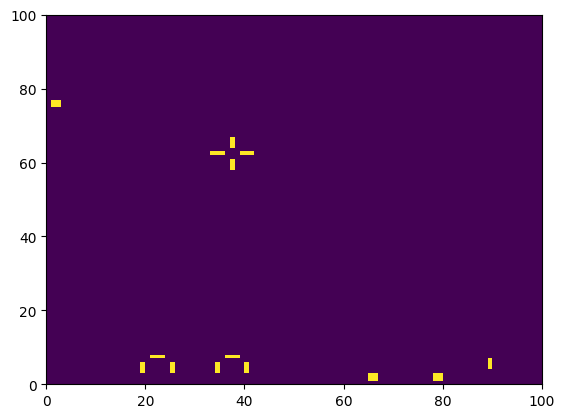

In [6]:
plt.pcolormesh(grid)
plt.axis('on')
plt.show()

In [1]:
from pysmt.shortcuts import Symbol, And, Solver, Equals, Iff, Not, TRUE, FALSE, Or, GE, LE, Int
from pysmt.typing import BOOL
import random
import matplotlib.pyplot as plt

In [2]:
def declare(grid_N, k):
   
    grid = ([[Symbol(f't{k};cell_{i}_{j}', BOOL) for i in range(grid_N[0])] for j in range(grid_N[1])])
    return grid

In [3]:
def init(state):
    x = random.randint(1,len(state[0])-2)
    y = random.randint(1,len(state)-2)
    
    trues = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            trues.append(state[y + i][x + j])

    for i in random.sample(range(len(state[0])),random.randint(0,len(state[0])-1)):
        trues.append(state[0][i])

    for j in random.sample(range(len(state)),random.randint(0,len(state)-1)):
        trues.append(state[j][0])
        
    ret = []
    for x in state:
        for y in x:
            if y not in trues:
                ret.append(y.Iff(FALSE()))
            else:
                ret.append(y.Iff(TRUE()))
    return ret

In [4]:
def get_values(states, solver):
    if solver.solve():
        return [[solver.get_value(states[y][x]) for x in range(len(states[0]))] for y in range(len(states))]

In [5]:
def print_state(values):
    to_print = []
    for i in values:
        row = []
        for j in i:
            if j.is_true():
                row.append(True)
            else:
                row.append(False)
        to_print.append(row)
    plt.pcolormesh(to_print)
    plt.axis('on')
    plt.show()

In [6]:
def trans(prev_values, state):
    ret = []
    for y in range(len(state)):
        for x in range(len(state[0])):
            cell = state[y][x]
            vizinhos = []
            for r1 in range(-1,2):
                for r2 in range(-1,2):
                    viz_x = (x + r1)
                    viz_y = (y + r2)
                    if (r1 == 0 and r2 == 0) or 0 > viz_x or viz_x > len(state[0])-1 or 0 > viz_y or viz_y > len(state)-1:
                        continue
                    vizinhos.append(prev_values[viz_y][viz_x])
            alive = 0
            for v in vizinhos:
                if v.is_true():
                    alive += 1
            if prev_values[y][x].is_true():
                if 2 <= alive <= 3:
                    ret.append(cell.Iff(TRUE()))
                else:
                    ret.append(cell.Iff(FALSE()))
            else:
                #se tiver 3 vizinhos, a celula é viva
                if alive == 3:
                    ret.append(cell.Iff(TRUE()))
                else:
                    ret.append(cell.Iff(FALSE()))
    return ret

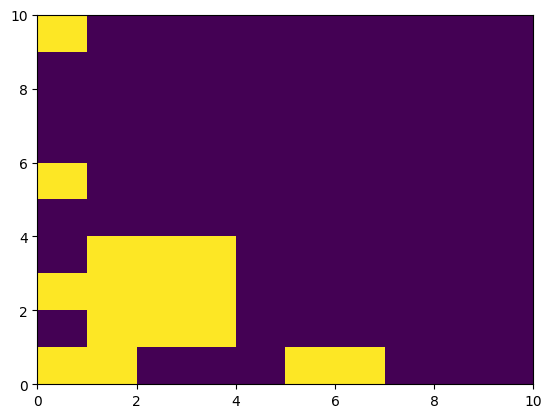

Ultima transição:


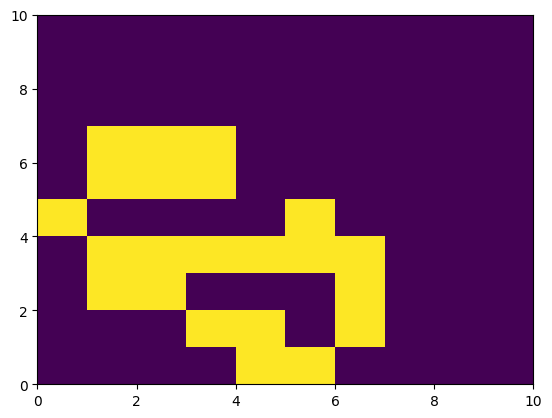

Todos os estados acessíveis contém pelo menos uma célula.
Não e possível resolver o B2


In [9]:
def euclides(declare,init,grid_N, t, print_all):
    with Solver(name="z3") as solver:
        states = [declare(grid_N, k) for k in range(t)]
        formula = []
        tr = init(states[0])
        formula.append(tr) # para verificar o B1
        for i in tr:
            solver.add_assertion(i)
        for k in range(t-1):
            values = get_values(states[k], solver)
            if print_all or k == 0:
                print_state(values)
            curr = trans(values, states[k+1])
            formula.append(curr)
            for i in curr:
                solver.add_assertion(i)
        print("Ultima transição:")
        values = get_values(states[t-1], solver)
        print_state(values)
        #B1
        #em cada estado tem que pelo menos uma celula morta ou viva
        for t in states:
            cells = [j.Iff(TRUE()) for i in t for j in i] + [j.Iff(FALSE()) for i in t for j in i]
            solver.add_assertion(Or(*cells))
        if solver.solve():
            print("Todos os estados acessíveis contém pelo menos uma célula.")
        else:
            print("Não e possível resolver o B1")
        #como B1 é sempre verdadeira podemos provar B2 sem remover as assertions
        #B2
        dict = {}
        for t in states:
            for y in range(len(t)):
                for x in range(len(t[0])):
                    if f"({x},{y})" not in dict:
                        dict[f"({x},{y})"] = [t[y][x].Iff(TRUE())]
                    else:
                        dict[f"({x},{y})"] += [t[y][x].Iff(TRUE())]      
        
        for v in dict.values():
            solver.add_assertion(Or(*v))
        if solver.solve():
            print("Todas a célula normal está viva pelo menos uma vez em algum estado acessível.")
        else:
            print("Não e possível resolver o B2")
            
days = 10
grid_N = (10,10)
print_all = False
euclides(declare,init,grid_N, days, print_all)